In [1]:
import torch
from torch import nn
from torchvision import models, datasets, transforms
from collections import OrderedDict
from tqdm import tqdm

In [2]:
batch_size = 64        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 20        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.4          # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0

In [3]:
from src.data import get_data_loaders
from src.model import MyModel

data_loaders = get_data_loaders(batch_size, valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(50, 0)
model

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


MyModel(
  (convblock1): ConvBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): ConvBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock3): ConvBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end

In [4]:
images, labels = next(iter(data_loaders['train']))
print(images[0])
print(labels[0])

tensor([[[-1.7195, -1.7195, -1.7195,  ..., -1.7195, -1.7195, -1.7195],
         [-1.7195, -1.7195, -1.7195,  ..., -1.7195, -1.7195, -1.7195],
         [-1.7195, -1.7195, -1.7195,  ..., -1.7195, -1.7195, -1.7195],
         ...,
         [-1.4433, -1.3270, -1.3270,  ..., -1.6759, -1.6759, -1.6759],
         [-1.3996, -1.3124, -1.3270,  ..., -1.6759, -1.6613, -1.6613],
         [-1.3415, -1.2833, -1.3270,  ..., -1.6468, -1.6323, -1.6323]],

        [[-1.7462, -1.7462, -1.7462,  ..., -1.7462, -1.7462, -1.7462],
         [-1.7462, -1.7462, -1.7462,  ..., -1.7462, -1.7462, -1.7462],
         [-1.7462, -1.7462, -1.7462,  ..., -1.7462, -1.7462, -1.7462],
         ...,
         [-1.5868, -1.4853, -1.4419,  ..., -1.7027, -1.7027, -1.7027],
         [-1.5288, -1.4709, -1.4709,  ..., -1.7027, -1.6882, -1.6882],
         [-1.4129, -1.4129, -1.4853,  ..., -1.6738, -1.6593, -1.6593]],

        [[-1.5536, -1.5536, -1.5536,  ..., -1.5536, -1.5536, -1.5536],
         [-1.5536, -1.5536, -1.5536,  ..., -1

In [5]:
print(images[0].min(), images[0].max())
print(images[0].mean())

tensor(-1.7462) tensor(1.9733)
tensor(-1.1617)


Reusing cached mean and std


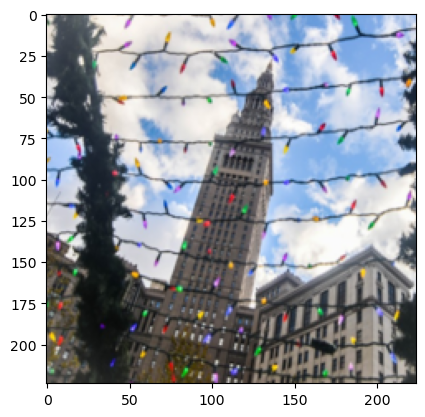

In [6]:
import matplotlib.pyplot as plt
from src.helpers import compute_mean_and_std

mean, std = compute_mean_and_std()
image = images[13] * std[:, None, None] + mean[:, None, None]
image = image.permute(1, 2, 0).clamp(0, 1)
plt.imshow(image)

In [ ]:

from test2 import train_model

train_loss, valid_loss = train_model(model, 'cpu', data_loaders, learning_rate=0.001, epochs=3)

Learning rate: 0.001
Epoch 1/3


Training:   0%|          | 0/63 [00:00<?, ?it/s]

In [8]:
try:
    from test import train_model
    print("Import successful")
except Exception as e:
    print(f"Import failed: {e}")

Import failed: cannot import name 'train_model' from 'test' (c:\Users\karen\Anaconda3\envs\pytorch-course\Lib\test\__init__.py)
